# SMS Text Classifier Using Neural Networks


## 1. Data Loading & Exploration


In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('valid-data.csv')

# Convert labels to binary
train_data['type'] = train_data['type'].map({'ham': 0, 'spam': 1})
test_data['type'] = test_data['type'].map({'ham': 0, 'spam': 1})

# Explore data
print(train_data.head())
print("\nClass distribution:")
print(train_data['type'].value_counts())

   type                                               text
0     0  ahhhh...just woken up!had a bad dream about u ...
1     0                           you can never do nothing
2     0  now u sound like manky scouse boy steve,like! ...
3     0  mum say we wan to go then go... then she can s...
4     0  never y lei... i v lazy... got wat? dat day ü ...

Class distribution:
type
0    3619
1     560
Name: count, dtype: int64


## 2. Text Preprocessing


In [7]:
def preprocess_text(data, max_words=10000, max_len=100):
    """Preprocess text data and return tokenizer and sequences"""
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(data['text'])

    sequences = tokenizer.texts_to_sequences(data['text'])
    padded = pad_sequences(sequences, maxlen=max_len, truncating='post')

    return tokenizer, padded, sequences

# Preprocess training and test data
max_words = 1000
max_len = 50
tokenizer, train_padded, _ = preprocess_text(train_data, max_words, max_len)
_, test_padded, _ = preprocess_text(test_data, max_words, max_len)

# Get labels
train_labels = train_data['type'].values
test_labels = test_data['type'].values

## 3. Model Building


In [8]:
def build_model(vocab_size, embedding_dim=16, max_len=50):
    """Build and compile text classification model"""
    model = keras.Sequential([
        keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(24, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# Build model
model = build_model(max_words, max_len=max_len)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Training & Evaluation


Epoch 1/10
131/131 - 2s - 18ms/step - accuracy: 0.8660 - loss: 0.3616 - val_accuracy: 0.8657 - val_loss: 0.3324
Epoch 2/10
131/131 - 0s - 3ms/step - accuracy: 0.8660 - loss: 0.2953 - val_accuracy: 0.8657 - val_loss: 0.3028
Epoch 3/10
131/131 - 1s - 5ms/step - accuracy: 0.8868 - loss: 0.2349 - val_accuracy: 0.8728 - val_loss: 0.2765
Epoch 4/10
131/131 - 0s - 3ms/step - accuracy: 0.9407 - loss: 0.1688 - val_accuracy: 0.8851 - val_loss: 0.2716
Epoch 5/10
131/131 - 0s - 3ms/step - accuracy: 0.9651 - loss: 0.1142 - val_accuracy: 0.8908 - val_loss: 0.2614
Epoch 6/10
131/131 - 1s - 4ms/step - accuracy: 0.9751 - loss: 0.0807 - val_accuracy: 0.8750 - val_loss: 0.3196
Epoch 7/10
131/131 - 0s - 3ms/step - accuracy: 0.9787 - loss: 0.0654 - val_accuracy: 0.8793 - val_loss: 0.3020
Epoch 8/10
131/131 - 1s - 5ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 0.8772 - val_loss: 0.3346
Epoch 9/10
131/131 - 1s - 10ms/step - accuracy: 0.9847 - loss: 0.0480 - val_accuracy: 0.8743 - val_loss: 0.3734

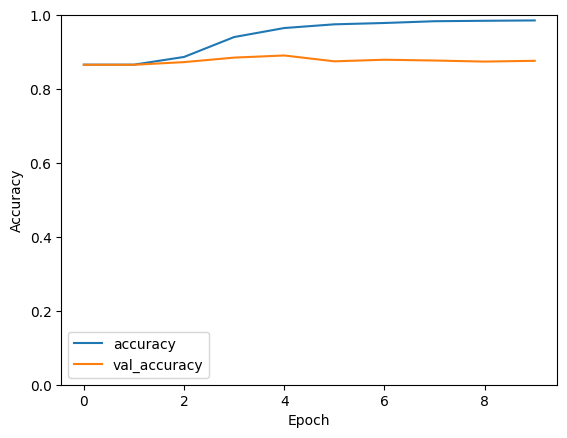

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - loss: 0.3294

Test accuracy: 87.64%


In [9]:
# Train model
history = model.fit(
    train_padded,
    train_labels,
    epochs=10,
    validation_data=(test_padded, test_labels),
    verbose=2
)

# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

plot_history(history)

# Evaluate model
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f'\nTest accuracy: {accuracy:.2%}')

## 5. Prediction Function


In [10]:
def predict_message(message):
    """Predict if message is ham or spam"""
    # Preprocess input
    sequence = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(sequence, maxlen=max_len, truncating='post')

    # Make prediction
    prediction = model.predict(padded)[0][0]
    label = 'spam' if prediction >= 0.5 else 'ham'

    return [prediction, label]

# Test prediction
test_messages = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005",
    "Hey there, just checking in to see how you're doing"
]

for msg in test_messages:
    print(f"\nMessage: {msg}")
    prediction = predict_message(msg)
    print(f"Prediction: {prediction[0]:.4f} ({prediction[1]})")


Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction: 0.7309 (spam)

Message: Hey there, just checking in to see how you're doing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: 0.0059 (ham)


## 6. Explanation

- **Model Type**: Neural network with embedding and dense layers for text classification
- **Input**: Processes SMS messages by converting words to numerical tokens
- **Output**: Predicts probability (0-1) of message being spam
- **Key Features**: Handles variable-length texts, learns word relationships



---

